In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('./all.csv')
# remove spaces from column names
df.columns = df.columns.str.strip()
for i, cn in enumerate(df.columns):
    cb = cn.replace(' ', '').replace(':', '')
    df.rename(columns={cn: cb}, inplace=True)

touse = ["system", \
        "nfit",\
        "n_under_threshold_1" , \
        "norma" , \
        "condition_number"]
#        "v_res_norm" , \
#        "v_res_over_threshold_1" , \
#        "Error10thiter" , \
#        "Error1stiter"]

for ctorm in df.columns:
    if ctorm not in touse:
        df.drop(columns=[ctorm], inplace=True)

# remove all row with a `nan` value
df = df.dropna()

print(df.columns)
print(df.values.shape)
#print(df["system"].unique())
#print(df)

Index(['system', 'nfit', 'norma', 'condition_number', 'n_under_threshold_1'], dtype='object')
(90, 5)


In [2]:
#filter all rows with system containing a specific substring
df = df[df['system'].str.contains('LONGDATA')]
#print(df.values.shape)
#print(df)

In [3]:
CORRCUT = 0.0001
corrmtx = df.loc[:,df.columns != 'system'].corr().abs()

for i, ci in enumerate(corrmtx):
    for j, cj in enumerate(corrmtx):
        if i > j:
            if corrmtx.iloc[i, j] > CORRCUT:
                print("%30s %30s %7.3f"%(ci, cj, corrmtx.iloc[i, j]))
    

                         norma                           nfit   0.331
              condition_number                           nfit   0.214
              condition_number                          norma   0.582
           n_under_threshold_1                           nfit   0.651
           n_under_threshold_1                          norma   0.440
           n_under_threshold_1               condition_number   0.230


In [4]:
# Code section that, for each couple of labels, scales the related data for each system and then
# stores it all together so we can plot everything together 
CORRCUT = 0.0001
HOWMANYSTD = 1.0

classifylabels = []

#labelstouse = ['condition_number', 'norma']
labelstouse = df.columns
selected_sys = []
selected_ang = []
selected_n = []
# making a list with every system in the .csv ()
for s in df["system"].values:
    ss = s.split('/')
    selected_sys.append(ss[1])# name of the system must be in ss[1]
    selected_n.append(ss[-2])
    selected_ang.append(ss[-1])

selected_sys = list(set(selected_sys))
selected_ang = list(set(selected_ang))
selected_n = list(set(selected_n))

print("Systems:")
for s in selected_sys:
    print(s)

print("Angles:")
for a in selected_ang:
    print(a)

print("N:")
for n in selected_n:
    print(n)

Systems:
aucl
h2o
au+
au2
Angles:
0
2_4
2
N:
n2
n3
n4
b20
b16


145 145 145 145
145 145
                          nfit Avg: 0.361 Std: 0.286 Min: 0.075 Max: 0.648
                         norma Avg: 0.041 Std: 0.173 Min: -0.132 Max: 0.215
     Corr: 0.331 N. Corr: 0.362 C. Corr: 0.378


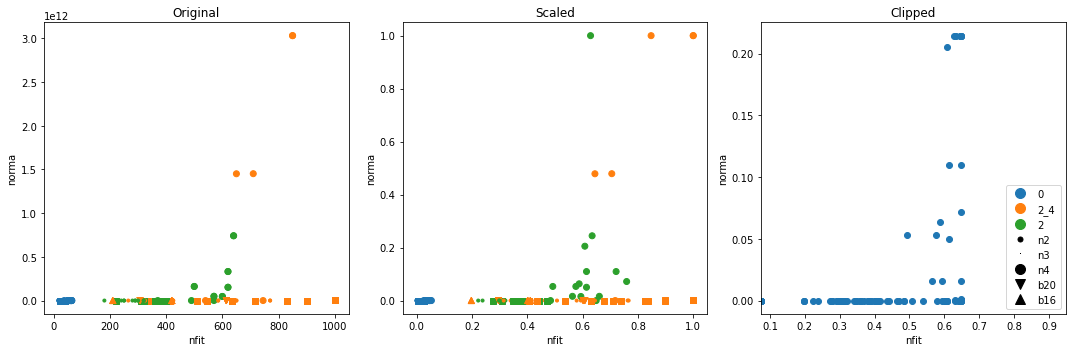

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

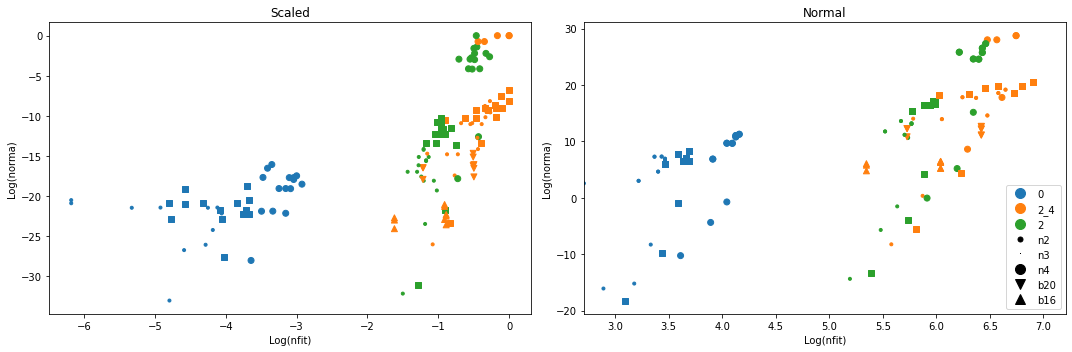


145 145 145 145
145 145
                          nfit Avg: 0.361 Std: 0.286 Min: 0.075 Max: 0.648
              condition_number Avg: 0.042 Std: 0.187 Min: -0.145 Max: 0.230
     Corr: 0.214 N. Corr: 0.384 C. Corr: 0.346


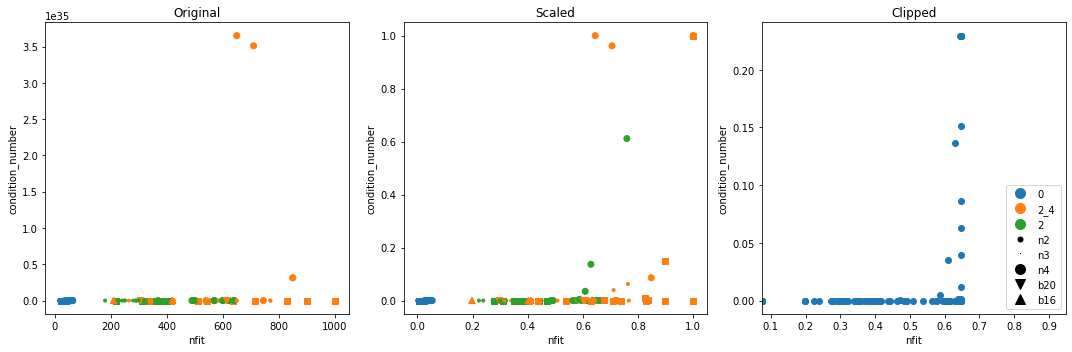

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

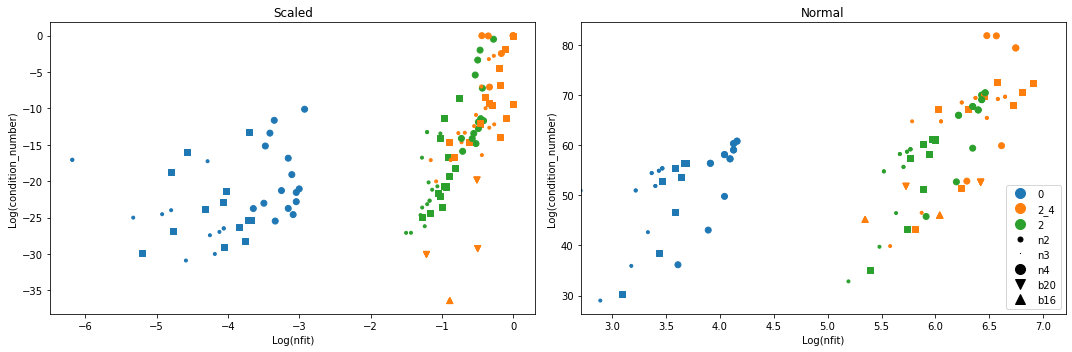


145 145 145 145
145 145
                          nfit Avg: 0.361 Std: 0.286 Min: 0.075 Max: 0.648
           n_under_threshold_1 Avg: 0.327 Std: 0.285 Min: 0.042 Max: 0.612
     Corr: 0.651 N. Corr: 0.658 C. Corr: 0.635


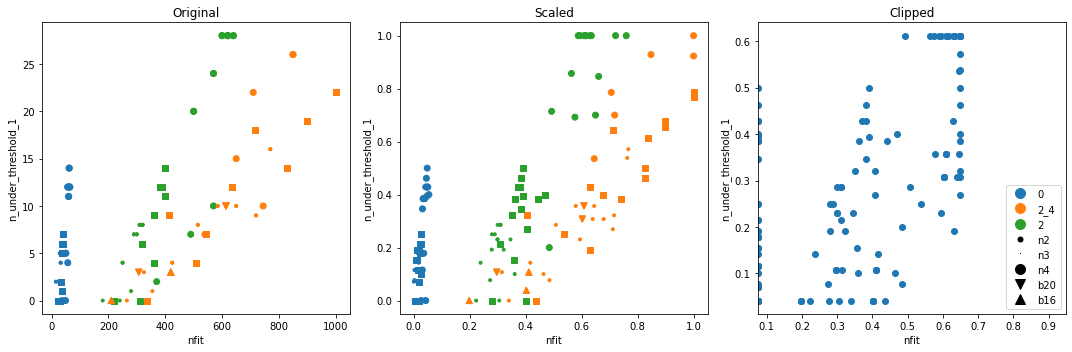

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)
/tmp/ipykernel_1326573/1041364705.py:147: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(lv1), np.log(lv2), ax = axis[1], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

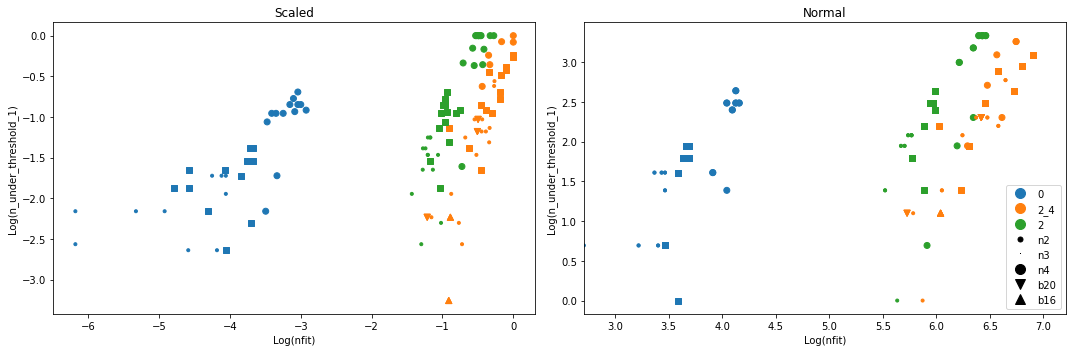


145 145 145 145
145 145
                         norma Avg: 0.041 Std: 0.173 Min: -0.132 Max: 0.215
                          nfit Avg: 0.361 Std: 0.286 Min: 0.075 Max: 0.648
     Corr: 0.331 N. Corr: 0.362 C. Corr: 0.378


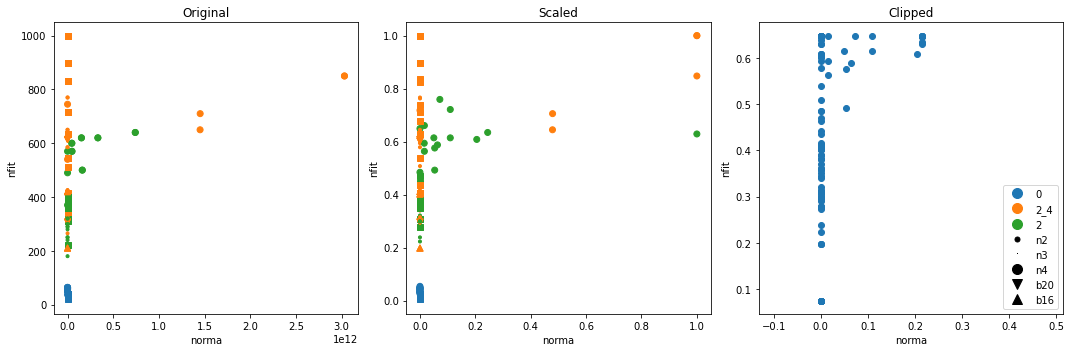

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

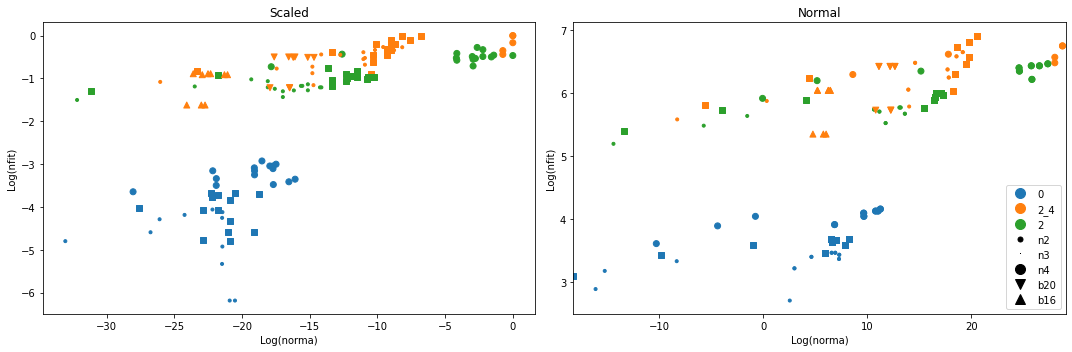


145 145 145 145
145 145
                         norma Avg: 0.041 Std: 0.173 Min: -0.132 Max: 0.215
              condition_number Avg: 0.042 Std: 0.187 Min: -0.145 Max: 0.230
     Corr: 0.582 N. Corr: 0.629 C. Corr: 0.667


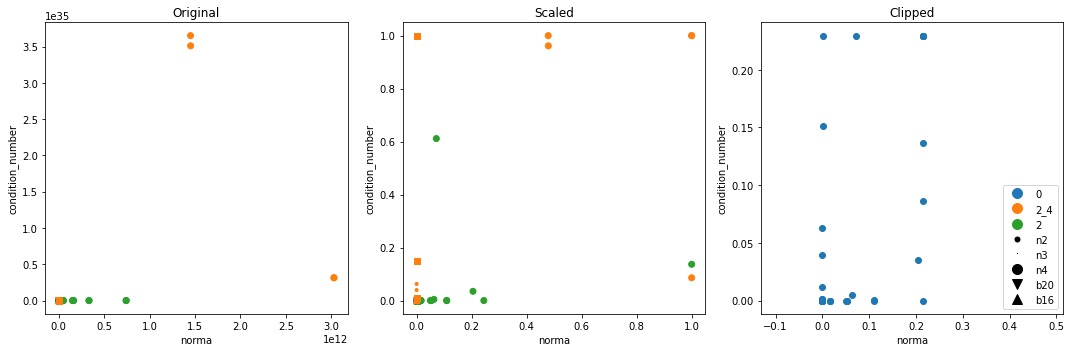

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

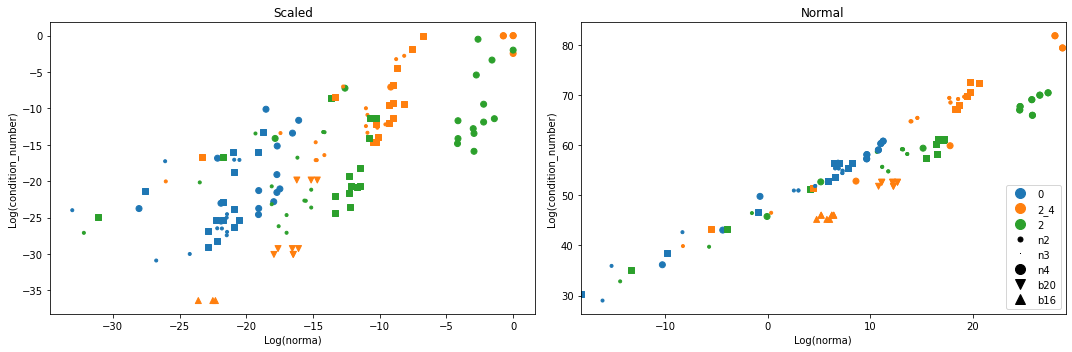


145 145 145 145
145 145
                         norma Avg: 0.041 Std: 0.173 Min: -0.132 Max: 0.215
           n_under_threshold_1 Avg: 0.327 Std: 0.285 Min: 0.042 Max: 0.612
     Corr: 0.440 N. Corr: 0.490 C. Corr: 0.488


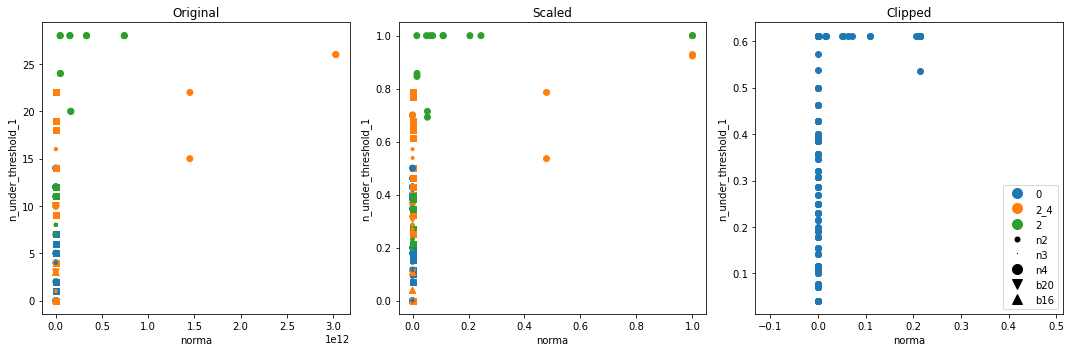

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)
/tmp/ipykernel_1326573/1041364705.py:147: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(lv1), np.log(lv2), ax = axis[1], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

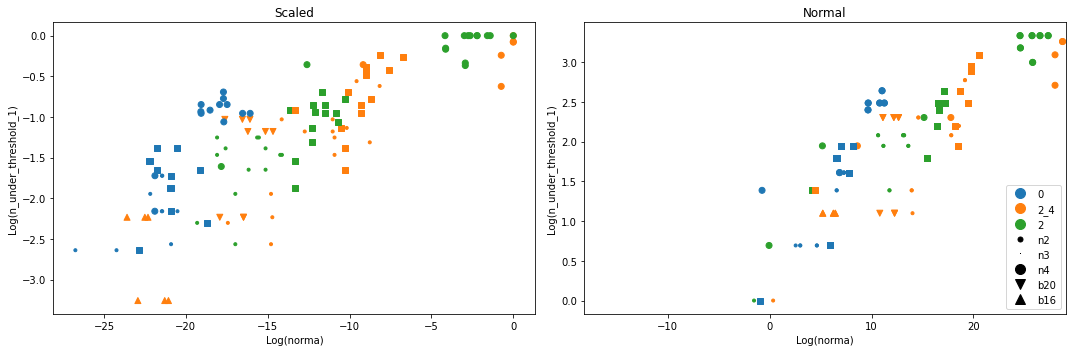


145 145 145 145
145 145
              condition_number Avg: 0.042 Std: 0.187 Min: -0.145 Max: 0.230
                          nfit Avg: 0.361 Std: 0.286 Min: 0.075 Max: 0.648
     Corr: 0.214 N. Corr: 0.384 C. Corr: 0.346


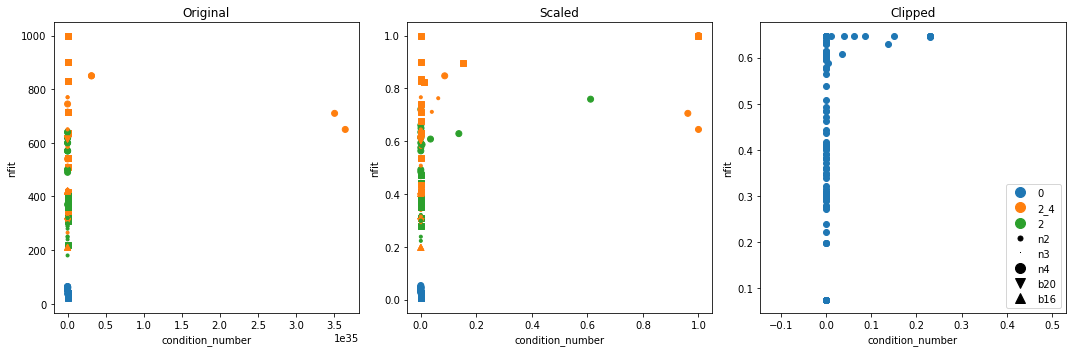

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

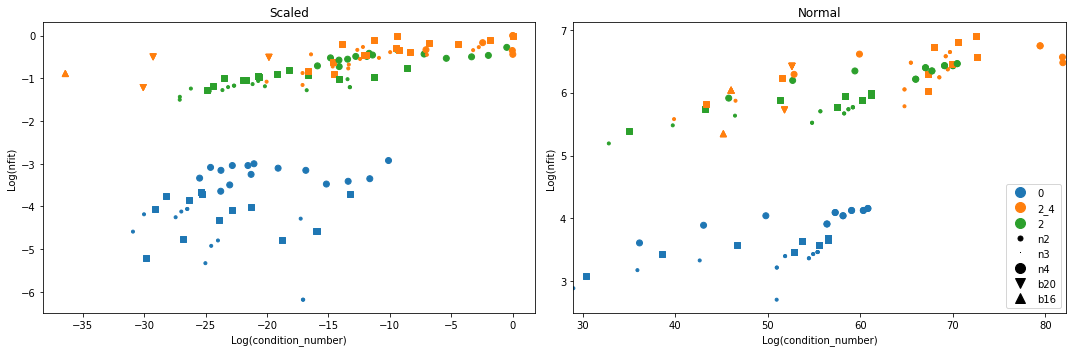


145 145 145 145
145 145
              condition_number Avg: 0.042 Std: 0.187 Min: -0.145 Max: 0.230
                         norma Avg: 0.041 Std: 0.173 Min: -0.132 Max: 0.215
     Corr: 0.582 N. Corr: 0.629 C. Corr: 0.667


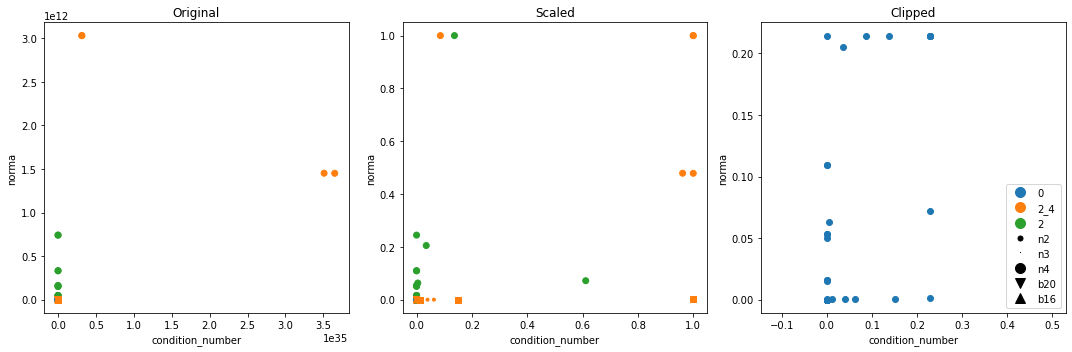

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

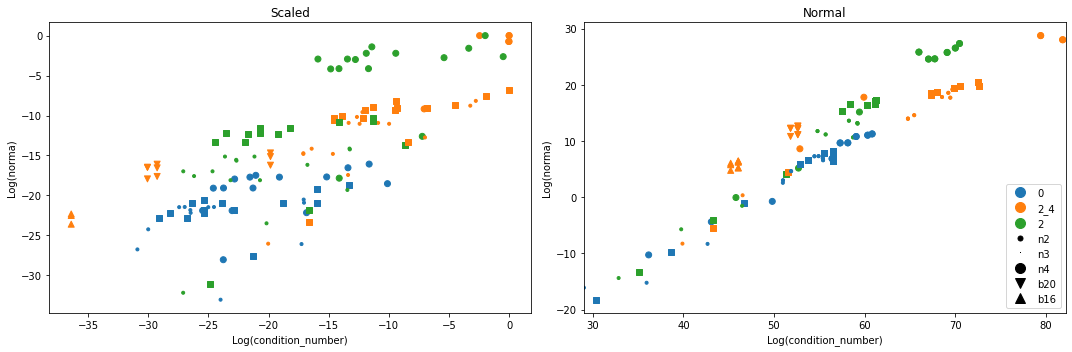


145 145 145 145
145 145
              condition_number Avg: 0.042 Std: 0.187 Min: -0.145 Max: 0.230
           n_under_threshold_1 Avg: 0.327 Std: 0.285 Min: 0.042 Max: 0.612
     Corr: 0.230 N. Corr: 0.388 C. Corr: 0.408


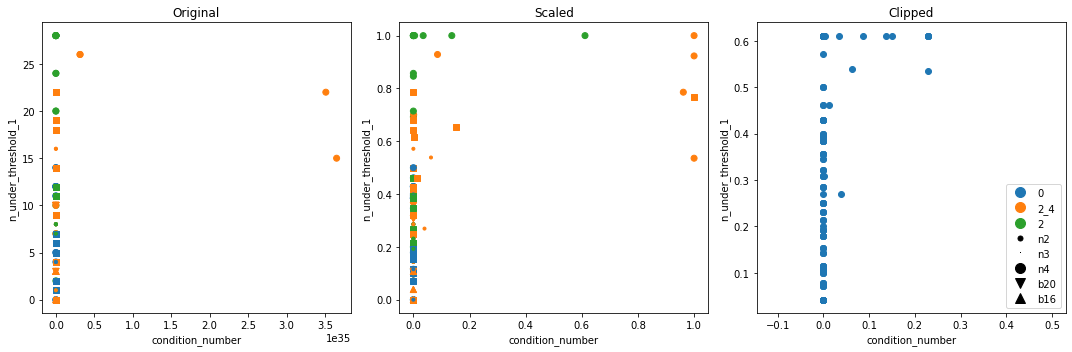

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)
/tmp/ipykernel_1326573/1041364705.py:147: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(lv1), np.log(lv2), ax = axis[1], m = shapes, c = colors)


<Figure size 432x288 with 0 Axes>

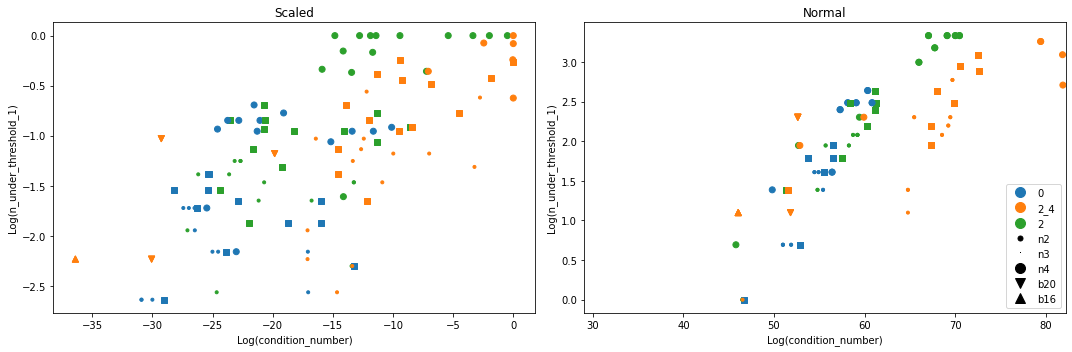


145 145 145 145
145 145
           n_under_threshold_1 Avg: 0.327 Std: 0.285 Min: 0.042 Max: 0.612
                          nfit Avg: 0.361 Std: 0.286 Min: 0.075 Max: 0.648
     Corr: 0.651 N. Corr: 0.658 C. Corr: 0.635


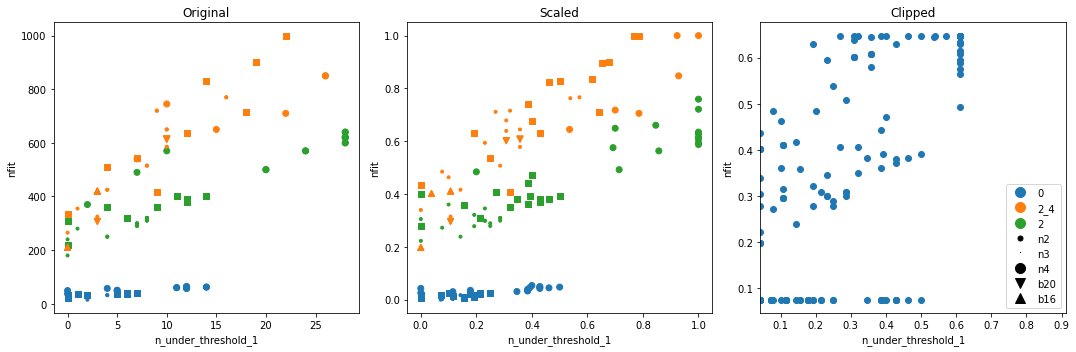

/tmp/ipykernel_1326573/1041364705.py:142: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)
/tmp/ipykernel_1326573/1041364705.py:147: RuntimeWarning: divide by zero encountered in log
  mscatter(np.log(lv1), np.log(lv2), ax = axis[1], m = shapes, c = colors)
/tmp/ipykernel_1326573/1041364705.py:150: RuntimeWarning: divide by zero encountered in log
  minv1 = np.min(np.log(lv1))
/tmp/ipykernel_1326573/1041364705.py:151: RuntimeWarning: divide by zero encountered in log
  maxv1 = np.max(np.log(lv1))


ValueError: Axis limits cannot be NaN or Inf

<Figure size 432x288 with 0 Axes>

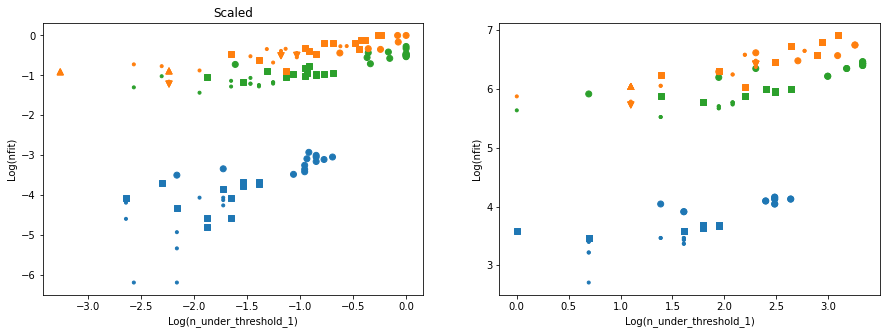

In [5]:
import matplotlib.lines as mlines

def mscatter(x, y, ax, m, **kw):
    import matplotlib.markers as mmarkers

    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

#get a list of possible markers from pyplot
fullmarkers = [m for m in plt.Line2D.markers]
#get a list of possible colors from pyplot
fullcolors = [c for c in plt.cm.tab10.colors]
#systemtomarker = {}
#for i, s in enumerate(selected_sys):
#    systemtomarker[s] = fullmarkers[i]
angtocolour = {}
legends = []
for i, a in enumerate(selected_ang):
    angtocolour[a] = fullcolors[i]
    leg = mlines.Line2D([], [], color=fullcolors[i], \
        marker='o', \
        linestyle='None', \
        markersize=10, label=str(a))
    legends.append(leg)
ntomarker = {}
for i, n in enumerate(selected_n):
    ntomarker[n] = fullmarkers[i]
    leg = mlines.Line2D([], [], color='black', \
        marker= fullmarkers[i] ,\
        linestyle='None', \
        markersize=10, label=str(n))
    legends.append(leg)

for i, label1 in enumerate(labelstouse):
    for j, label2 in enumerate(labelstouse):
        # svuoto i definitivi ogni volta che cambiano i label
        lv1 = []
        lv2 = []
        slv1 = []
        slv2 = []
        colors = []
        shapes = []
        df_sys = []
        
        if label1 != "system" and label2 != "system" and i != j:
            for msys in selected_sys:
                # "svuoto" i tmp ogni volta che cambia sistema
                lv1_tmp = []
                lv2_tmp = []
                slv1_tmp = []
                slv2_tmp = []
                
                # Seleziono solo la parte dei dati del sistema da normalizzare
                df_tmp = df[df['system'].str.contains(msys)]

                for v in df_tmp["system"].values:
                    vl = v.split("/")
                    if len(vl) != 5:
                        print("Error: ", vl)
                        exit()

                    colors.append(angtocolour[vl[4]])
                    shapes.append(ntomarker[vl[3]])
                
                lv1_tmp = df_tmp[label1].values.astype(float)
                lv2_tmp = df_tmp[label2].values.astype(float)
                
                lv1 = np.append(lv1, lv1_tmp)
                lv2 = np.append(lv2, lv2_tmp)
                
                # scale the data
                scaler = MinMaxScaler()
                slv1_tmp = scaler.fit_transform(lv1_tmp.reshape(-1, 1)).flatten()
                slv2_tmp = scaler.fit_transform(lv2_tmp.reshape(-1, 1)).flatten()
                slv1 = np.append(slv1, slv1_tmp)
                slv2 = np.append(slv2, slv2_tmp)
            
            print(len(lv1), len(lv2), len(slv1), len(slv2))
            print(len(colors), len(shapes))
            corr = abs(corrmtx.loc[label1,label2])
            alv1 = np.average(slv1)
            alv2 = np.average(slv2)  
            stddev1 = np.std(slv1)
            stddev2 = np.std(slv2)
            minv1 = alv1 - HOWMANYSTD*stddev1
            maxv1 = alv1 + HOWMANYSTD*stddev1
            minv2 = alv2 - HOWMANYSTD*stddev2
            maxv2 = alv2 + HOWMANYSTD*stddev2
            clv1 = np.clip(slv1, minv1, maxv1)
            clv2 = np.clip(slv2, minv2, maxv2)
            #print(type(slv1), type(clv1))
            if stddev1 == 0.0 or stddev2 == 0.0:
                continue
            else:
                scorr = math.fabs(np.corrcoef(slv1, slv2)[0, 1])
                ccorr = math.fabs(np.corrcoef(clv1, clv2)[0, 1])
                
                # l'ho commentata perchè volevo stamparli tutti 
                #if corr > CORRCUT or scorr > CORRCUT or ccorr > CORRCUT:
                print("%30s Avg: %5.3f Std: %5.3f Min: %5.3f Max: %5.3f"%(label1,  alv1, stddev1, minv1, maxv1))
                print("%30s Avg: %5.3f Std: %5.3f Min: %5.3f Max: %5.3f"%(label2,  alv2, stddev2, minv2, maxv2)) 
                print("     Corr: %5.3f N. Corr: %5.3f C. Corr: %5.3f"%(corr, scorr, ccorr))
                
                figure, axis = plt.subplots(1, 3)
                figure.set_size_inches(15, 5)
                
                #Questi li ho commentati perchè non credo abbiano perchè sono tutti sistemi diversi
                mscatter(lv1, lv2, ax=axis[0] , m=shapes, c = colors)
                axis[0].set_xlabel(label1)
                axis[0].set_ylabel(label2)
                axis[0].set_title("Original")
                mscatter(slv1, slv2, ax = axis[1] , m = shapes, c = colors)
                axis[1].set_xlabel(label1)
                axis[1].set_ylabel(label2)
                axis[1].set_title("Scaled")
                #axis[2].scatter(clv1, clv2, c = colors, marker = df_style)
                axis[2].scatter(clv1, clv2)
                axis[2].set_xlabel(label1)
                axis[2].set_ylabel(label2)
                axis[2].set_xlim(minv1, maxv1+0.3)
                axis[2].set_title("Clipped")
                #figure.legend(handles=legends, loc='lower right')
                plt.legend(handles=legends, loc='lower right')
                plt.tight_layout()
                plt.show()
                
                plt.clf()
                figure, axis = plt.subplots(1, 2)
                figure.set_size_inches(15, 5)

                mscatter(np.log(slv1), np.log(slv2), ax = axis[0], m = shapes, c = colors)
                axis[0].set_xlabel("Log("+label1+")")
                axis[0].set_ylabel("Log("+label2+")")
                axis[0].set_title("Scaled")

                mscatter(np.log(lv1), np.log(lv2), ax = axis[1], m = shapes, c = colors)
                axis[1].set_xlabel("Log("+label1+")")
                axis[1].set_ylabel("Log("+label2+")")
                minv1 = np.min(np.log(lv1))
                maxv1 = np.max(np.log(lv1))
                axis[1].set_xlim(minv1, maxv1+0.3)
                axis[1].set_title("Normal")
                
                #figure.legend(handles=legend_handles, loc='lower right')
                plt.legend(handles=legends, loc='lower right')

                plt.tight_layout()
                plt.show()

                print()
